<a href="https://colab.research.google.com/github/wcrowley342/bookanalysis/blob/main/Book_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I'd like to read more fiction; how can I use data to inform which author I should start reading/following? (the analysis mostly looks at author data, as opossed to individual book data...)

# INTRO & READ IN DATA

In [1]:
# Some basic, common libraries used:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from matplotlib import rcParams
import seaborn as sns
import plotly as py
import plotly.express as px

#Read in data into "titles" data frame

titles_df = pd.read_csv('https://raw.githubusercontent.com/wcrowley342/bookanalysis/main/titles.csv')

https://data.post45.org/new-york-times-hardcover-fiction-bestsellers-1931-2020-curatorial-statement/

this dataset covers the full list since its inception in 1931, along with each reported work’s title, author(s), date of appearance, and rank.

This dataset provides valuable metadata for researchers of 20th century American
literature working in fields such as cultural analytics, book and publishing history, and the
sociology of literature

nyt_titles.tsv

*   id – an arbitrary unique id for the novel
*   title – the title of the novel, as reported by the New York Times
*   author – the author of the novel, as reported by the New York Times
*   year – the first year that the novel appears on the bestseller list. 
*   total_weeks – the total number of weeks the title was on the list
*   first_week – the first week that the novel appears on the bestseller list
*   debut_rank – the book’s bestseller rank in the week of its first appearance
*   best_rank – the highest rank achieved by the title while on the list


In [2]:
titles_df.head()

,id,title,author,year,total_weeks,first_week,debut_rank,best_rank
0,0,"""H"" IS FOR HOMICIDE",Sue Grafton,1991,15,1991-05-05,15,2
1,1,"""I"" IS FOR INNOCENT",Sue Grafton,1992,11,1992-04-26,2,2
2,10,''G'' IS FOR GUMSHOE,Sue Grafton,1990,6,1990-05-06,8,8
3,100,A DOG'S JOURNEY,W. Bruce Cameron,2012,1,2012-05-27,14,14
4,1000,CHANGING FACES,Kimberla Lawson Roby,2006,1,2006-02-19,14,14


In [3]:
titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7431 entries, 0 to 7430
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0    id          7431 non-null   int64 
 1   title        7431 non-null   object
 2   author       7427 non-null   object
 3   year         7431 non-null   int64 
 4   total_weeks  7431 non-null   int64 
 5   first_week   7431 non-null   object
 6   debut_rank   7431 non-null   int64 
 7   best_rank    7431 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 464.6+ KB


In [4]:
titles_df.describe()

,id,year,total_weeks,debut_rank,best_rank
count,7431.000000,7431.000000,7431.000000,7431.000000,7431.000000
mean,3715.000000,1989.605168,8.126228,8.625353,6.914278
std,2145.289258,26.234540,11.208171,4.758091,4.567460
min,0.000000,1931.000000,1.000000,1.000000,1.000000
25%,1857.500000,1968.000000,2.000000,4.000000,3.000000
50%,3715.000000,2000.000000,4.000000,9.000000,6.000000
75%,5572.500000,2011.000000,10.000000,13.000000,10.000000
max,7430.000000,2020.000000,178.000000,17.000000,17.000000


Some observiations

*   Time period is 1931-2020
*   Avg duration of a book on list is 8 weeks, max is 178 ('oh the places you'll go)



In [5]:
longest_books=titles_df.sort_values('total_weeks', ascending=False)
longest_books[["title", "author", "year", "total_weeks"]].head(10)

,title,author,year,total_weeks
2606,"OH, THE PLACES YOU'LL GO!",Dr. Seuss,1990,178
4355,THE DA VINCI CODE,Dan Brown,2003,165
4219,THE CELESTINE PROPHECY,James Redfield,1994,165
4139,THE BRIDGES OF MADISON COUNTY,Robert James Waller,1992,164
3124,ALL THE LIGHT WE CANNOT SEE,Anthony Doerr,2014,132
4167,THE CAINE MUTINY,Herman Wouk,1951,123
6934,WHERE THE CRAWDADS SING,Delia Owens,2018,114
4990,AUNTIE MAME,Patrick Dennis,1955,112
5732,THE ROBE,Lloyd C. Douglas,1942,111
4870,THE HELP,Kathryn Stockett,2009,108


In [6]:
debut_at_top = titles_df.loc[(titles_df['debut_rank'] == 1)]
debut_at_top.head()

,id,title,author,year,total_weeks,first_week,debut_rank,best_rank
21,1016,CHASING FIRE,Nora Roberts,2011,5,2011-05-01,1,1
29,1023,CHESAPEAKE,James A. Michener,1978,47,1978-07-23,1,1
30,1024,CHESAPEAKE BLUE,Nora Roberts,2002,5,2002-11-24,1,1
39,1032,CHILL FACTOR,Sandra Brown,2005,6,2005-09-04,1,1
66,1057,CIRCE,Madeline Miller,2018,16,2018-04-29,1,1


In [7]:
debut_at_top.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 627 entries, 21 to 7430
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0    id          627 non-null    int64 
 1   title        627 non-null    object
 2   author       627 non-null    object
 3   year         627 non-null    int64 
 4   total_weeks  627 non-null    int64 
 5   first_week   627 non-null    object
 6   debut_rank   627 non-null    int64 
 7   best_rank    627 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 44.1+ KB


# CLEAN UP DATA

# "MOST PROLIFIC" (AUTHOR WITH MOST TITLES ON LIST)

In [2]:
titles_df['author'].value_counts()[:10]

Danielle Steel        116
Stuart Woods           63
Stephen King           54
Robert B. Parker       47
John Sandford          44
David Baldacci         42
Sandra Brown           40
Dean Koontz            40
Mary Higgins Clark     40
Nora Roberts           38
Name: author, dtype: int64

wow, check out daneille steel? nearly double the next author. never heard of her, maybe I should check out a book or two of hers. (Same goes for stuart woods, looks like he had a series of novels about a character named Stone Barrington)

In [3]:
top_ten_by_titles = titles_df['author'].value_counts()[:10]

In [4]:
top_ten_by_titles.info()

<class 'pandas.core.series.Series'>
Index: 10 entries, Danielle Steel to Nora Roberts
Series name: author
Non-Null Count  Dtype
--------------  -----
10 non-null     int64
dtypes: int64(1)
memory usage: 160.0+ bytes


In [5]:
new_df = pd.DataFrame(data=top_ten_by_titles, columns=['author', 'number_of_titles'])
new_df.reset_index(inplace=True)
new_df = new_df.rename(columns = {'index':'authors'})
del new_df['number_of_titles']
new_df = new_df.rename(columns = {'author':'books_on_list'})
print(new_df)

              authors  books_on_list
0      Danielle Steel            116
1        Stuart Woods             63
2        Stephen King             54
3    Robert B. Parker             47
4       John Sandford             44
5      David Baldacci             42
6        Sandra Brown             40
7         Dean Koontz             40
8  Mary Higgins Clark             40
9        Nora Roberts             38


NameError: ignored

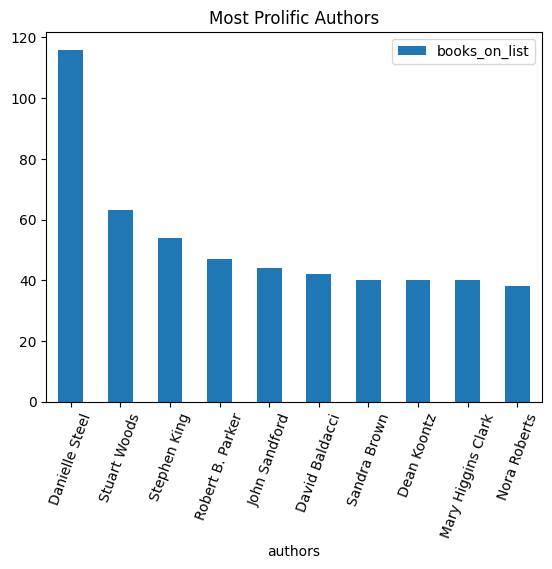

In [6]:
# Draw a vertical bar chart

new_df.plot.bar(x="authors", y="books_on_list", rot=70, title="Most Prolific Authors");

plot.show(block=True);

https://drive.google.com/file/d/14QC6AWnJe44zJ5thcJEjquGnt5O-M6ke/view?usp=share_link

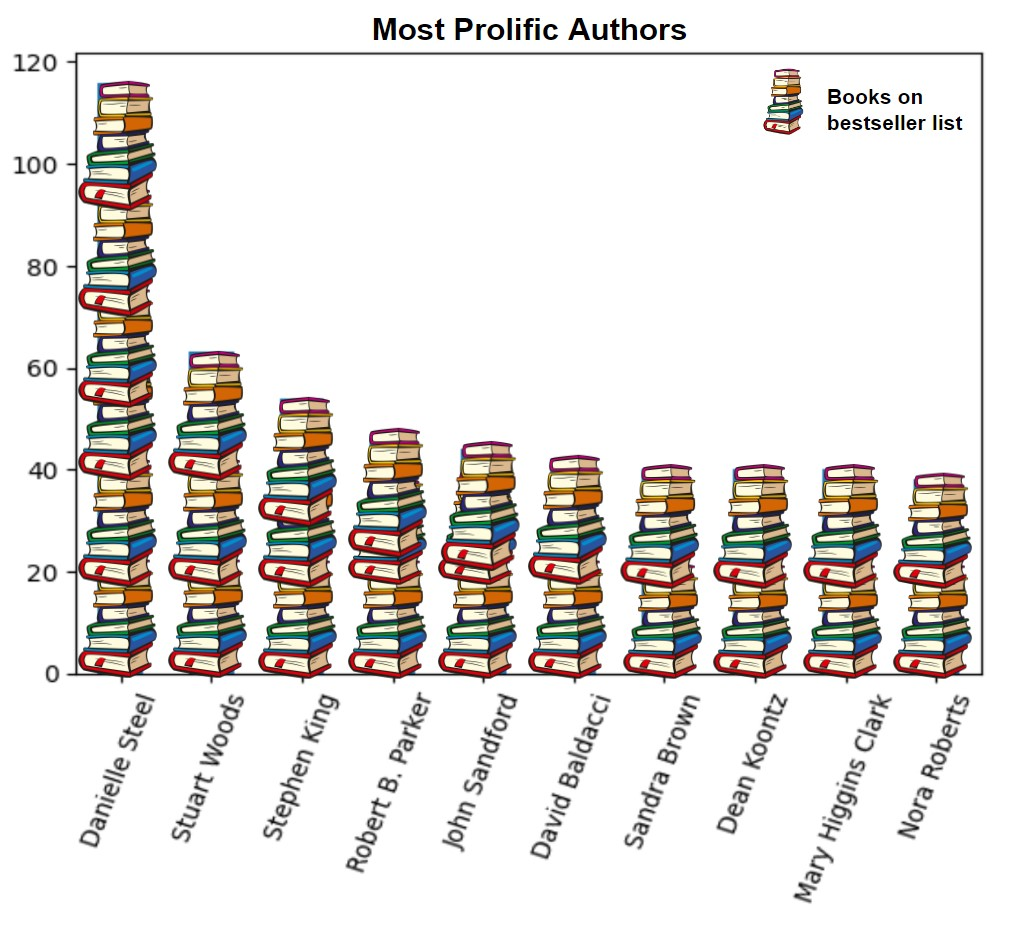

# "LONGEST STRETCH BETWEEN BEST SELLERS" (GREATEST TIMESPAN BETWEEN BESTSELLING BOOKS)

match rows by author, find the greatest datediff of first weeks for 

get 2 tables
*   Get/filter the authors with 2+ records. Find/filter on max of first week for reach author.... create a table called 'newest_book' , (update column so book is called 'newest book') DO A GROUP BY MAX
*   Get/filter the authors with 2+ records. Find/filter on min of first week for each author.... create a table called 'oldest book' (update column so book is called 'oldest book') DO A GROUP BY MIN
*   combine these 2 tables on the 'author' column; resulting table should have

author | oldest book | newest book | oldest date | newest date

*   create a new column coalled 'date_diff' , that is the difference of 'oldest_date and newest_date
*   order this table by max of 'date_diff'



In [65]:
oldest = titles_df.groupby('author')['year'].max().reset_index()
df_oldest = pd.DataFrame(data=oldest)
df_oldest.columns = ['author', 'first_year_on_list']
print(df_oldest)

#why is this not working / the same as the output for .min?

                                                 author  first_year_on_list
0                                         Martha Grimes                1987
1                             Elizabeth Forsythe Hailey                1986
2                                     James A. Michener                1987
3                               Maxence van der Meersch                1937
4                                     ! by Fannie Flagg                1998
...                                                 ...                 ...
2205            written and illustrated by James Gurney                1992
2206               written and illustrated by Jan Brett                1990
2207  written and illustrated by Janet and Allan Ahl...                1991
2208   written and illustrated by Mattie J. T. Stepanek                2002
2209    written and illustrated by Mattie J.T. Stepanek                2001

[2210 rows x 2 columns]


In [66]:
newest = titles_df.groupby('author')['year'].min().reset_index()
df_newest = pd.DataFrame(data=newest)
df_newest.columns = ['author', 'last_year_on_list']
print(df_newest)

                                                 author  last_year_on_list
0                                         Martha Grimes               1987
1                             Elizabeth Forsythe Hailey               1986
2                                     James A. Michener               1987
3                               Maxence van der Meersch               1937
4                                     ! by Fannie Flagg               1998
...                                                 ...                ...
2205            written and illustrated by James Gurney               1992
2206               written and illustrated by Jan Brett               1990
2207  written and illustrated by Janet and Allan Ahl...               1991
2208   written and illustrated by Mattie J. T. Stepanek               2001
2209    written and illustrated by Mattie J.T. Stepanek               2001

[2210 rows x 2 columns]


In [70]:
merged_df_duration = pd.merge(df_newest,df_oldest,on='author',how="outer")
print(merged_df_duration)
m

                                                 author  last_year_on_list  \
0                                         Martha Grimes               1987   
1                             Elizabeth Forsythe Hailey               1986   
2                                     James A. Michener               1987   
3                               Maxence van der Meersch               1937   
4                                     ! by Fannie Flagg               1998   
...                                                 ...                ...   
2205            written and illustrated by James Gurney               1992   
2206               written and illustrated by Jan Brett               1990   
2207  written and illustrated by Janet and Allan Ahl...               1991   
2208   written and illustrated by Mattie J. T. Stepanek               2001   
2209    written and illustrated by Mattie J.T. Stepanek               2001   

      first_year_on_list  
0                   1987  
1        

NameError: ignored

In [71]:
merged_df_duration['timespan'] = merged_df_duration['last_year_on_list'] - merged_df_duration['first_year_on_list']
print(merged_df_duration)

                                                 author  last_year_on_list  \
0                                         Martha Grimes               1987   
1                             Elizabeth Forsythe Hailey               1986   
2                                     James A. Michener               1987   
3                               Maxence van der Meersch               1937   
4                                     ! by Fannie Flagg               1998   
...                                                 ...                ...   
2205            written and illustrated by James Gurney               1992   
2206               written and illustrated by Jan Brett               1990   
2207  written and illustrated by Janet and Allan Ahl...               1991   
2208   written and illustrated by Mattie J. T. Stepanek               2001   
2209    written and illustrated by Mattie J.T. Stepanek               2001   

      first_year_on_list  timespan  
0                   1987  

filtering the dataframe to get records where author appears more than once...

https://www.geeksforgeeks.org/numpy-where-in-python/
https://www.digitalocean.com/community/tutorials/python-numpy-where 
https://www.includehelp.com/python/how-to-filter-a-pandas-dataframe-based-on-value-counts.aspx
https://stackoverflow.com/questions/29836836/how-do-i-filter-a-pandas-dataframe-based-on-value-counts
https://softhints.com/pandas-how-to-filter-results-of-value_counts/

In [14]:
#multiple_books_df1 = titles_df['author'].value_counts()[>10]
#multiple_books = titles_df.where(titles_df.author.value_counts > 2)
multiple_books1 = titles_df['author'].value_counts().loc[lambda x : x>1]
print(multiple_books1)

Danielle Steel                    116
Stuart Woods                       63
Stephen King                       54
Robert B. Parker                   47
John Sandford                      44
                                 ... 
Joseph Fink and Jeffrey Cranor      2
MaryJanice Davidson                 2
Christina Baker Kline               2
Sebastian Faulks                    2
James Wesley Rawles                 2
Name: author, Length: 978, dtype: int64


In [16]:
multiple_books1 = multiple_books1.reset_index()

In [17]:
multiple_books1.head()

,index,author
0,Danielle Steel,116
1,Stuart Woods,63
2,Stephen King,54
3,Robert B. Parker,47
4,John Sandford,44


In [56]:
multiple_books1_df = pd.DataFrame(multiple_books1)
print(multiple_books1_df)

                              index  author
0                    Danielle Steel     116
1                      Stuart Woods      63
2                      Stephen King      54
3                  Robert B. Parker      47
4                     John Sandford      44
..                              ...     ...
973  Joseph Fink and Jeffrey Cranor       2
974             MaryJanice Davidson       2
975           Christina Baker Kline       2
976                Sebastian Faulks       2
977             James Wesley Rawles       2

[978 rows x 2 columns]


In [57]:
multiple_books1_df.columns = ['author','number_of_books']
print(multiple_books1_df)

                             author  number_of_books
0                    Danielle Steel              116
1                      Stuart Woods               63
2                      Stephen King               54
3                  Robert B. Parker               47
4                     John Sandford               44
..                              ...              ...
973  Joseph Fink and Jeffrey Cranor                2
974             MaryJanice Davidson                2
975           Christina Baker Kline                2
976                Sebastian Faulks                2
977             James Wesley Rawles                2

[978 rows x 2 columns]


In [58]:
merged_df3 = pd.merge(multiple_books1_df,titles_df,on='authors',how="outer")
print(merged_df3)

KeyError: ignored

# AUTHOR WITH MOST WEEKS

(group by Author, ordered rank of sum total weeks)

https://data36.com/pandas-tutorial-2-aggregation-and-grouping/ 

https://sparkbyexamples.com/pandas/pandas-groupby-sum-examples/#:~:text=Pandas%20groupby()%20%26%20sum(),groupby(%5B'Courses'%5D). 

https://stackoverflow.com/questions/39922986/how-do-i-pandas-group-by-to-get-sum 

(cool graph opportunity where you stack the bars by legnth on a timeline)

In [72]:
titles_df.total_weeks.sum()

60386

In [73]:
most_weeks = titles_df.groupby('author').sum()[['total_weeks']]

<ipython-input-73-ced68516ea8b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_weeks = titles_df.groupby('author').sum()[['total_weeks']]


In [74]:
sorted_most_weeks=most_weeks.sort_values('total_weeks', ascending=False)
print(sorted_most_weeks)

                                                 total_weeks
author                                                      
Danielle Steel                                           957
Stephen King                                             892
John Grisham                                             789
Taylor Caldwell                                          524
James A. Michener                                        477
...                                                      ...
Lana Del Rey                                               1
Lara Adrian                                                1
Lars Kepler                                                1
Lauren Graham                                              1
written and illustrated by Mattie J.T. Stepanek            1

[2210 rows x 1 columns]


In [75]:
most_weeks_df = most_weeks.reset_index()

In [76]:
most_weeks_df.head()

,author,total_weeks
0,Martha Grimes,1
1,Elizabeth Forsythe Hailey,1
2,James A. Michener,1
3,Maxence van der Meersch,2
4,! by Fannie Flagg,11


In [77]:
most_weeks_df.sort_values(by='total_weeks', ascending=False)

,author,total_weeks
382,Danielle Steel,957
1932,Stephen King,892
1080,John Grisham,789
1997,Taylor Caldwell,524
894,James A. Michener,477
...,...,...
1260,Lana Del Rey,1
1261,Lara Adrian,1
1269,Lars Kepler,1
1276,Lauren Graham,1


In [78]:
most_weeks_df = most_weeks_df.rename(columns = {'author':'authors'})

In [79]:
most_weeks_df.head()

,authors,total_weeks
0,Martha Grimes,1
1,Elizabeth Forsythe Hailey,1
2,James A. Michener,1
3,Maxence van der Meersch,2
4,! by Fannie Flagg,11


# "STAYING POWER" AUTHOR WITH LONGEST AVG WEEKS PER TITLE

Take above 'most weeks', divided by number/count of books, to help get a sense of staying power for each author.

The average for the titles list is 8.1

In [80]:
titles_df['author'].value_counts()
top_by_titles = titles_df['author'].value_counts()
top_by_titles = pd.DataFrame(data=top_by_titles, columns=['author', 'number_of_titles'])
top_by_titles.reset_index(inplace=True)
top_by_titles = top_by_titles.rename(columns = {'index':'authors'})
del top_by_titles['number_of_titles']
top_by_titles = top_by_titles.rename(columns = {'author':'books_on_list'})
print(top_by_titles)

                                    authors  books_on_list
0                            Danielle Steel            116
1                              Stuart Woods             63
2                              Stephen King             54
3                          Robert B. Parker             47
4                             John Sandford             44
...                                     ...            ...
2205                            Joseph Fink              1
2206                            A. S. Byatt              1
2207  Raymond Chandler and Robert B. Parker              1
2208                            Noel Coward              1
2209                          Frank Tilsley              1

[2210 rows x 2 columns]


In [81]:
merged_df = pd.merge(most_weeks_df,top_by_titles,on='authors',how="outer")

In [82]:
merged_df.head()

,authors,total_weeks,books_on_list
0,Martha Grimes,1,1
1,Elizabeth Forsythe Hailey,1,1
2,James A. Michener,1,1
3,Maxence van der Meersch,2,1
4,! by Fannie Flagg,11,1


In [83]:
merged_df['avg_weeks_on_list_per_book'] = merged_df['total_weeks'] / merged_df['books_on_list']

In [84]:
multiple_books_merged_df = merged_df[merged_df['books_on_list'] >3]

In [85]:
multiple_books_merged_df = multiple_books_merged_df.sort_values(by='avg_weeks_on_list_per_book', ascending=False)
multiple_books_merged_df.head(10)

,authors,total_weeks,books_on_list,avg_weeks_on_list_per_book
375,Dan Brown,287,5,57.400000
865,J. K. Rowling,197,4,49.250000
1736,Richard Bach,191,4,47.750000
1632,Patrick Dennis,179,4,44.750000
1789,Robert James Waller,221,5,44.200000
809,Herman Wouk,375,9,41.666667
889,Jacqueline Susann,158,4,39.500000
96,Allen Drury,258,7,36.857143
1298,Leon Uris,405,11,36.818182
1334,Lloyd C. Douglas,233,7,33.285714


certainly makes sense, we see some authors on here with extremely popular series (JK rowling, Dan brown) 

also see some that had big hits (robert james waller- bridges of madison county, 164 weeks, that might've had an outsized impact on his nubmers.

check out richard bach, having best sellers in the 70s, 80s, 90s, and 00s

https://en.wikipedia.org/wiki/Jacqueline_Susann

Jacqueline Susann (August 20, 1918 – September 21, 1974) was an American novelist and actress. Her iconic novel, Valley of the Dolls (1966), is one of the best-selling books in publishing history.[2] With her two subsequent works, The Love Machine (1969) and Once Is Not Enough (1973), Susann became the first author to have three novels top The New York Times Best Seller List consecutively.[3]

# LIMITATIONS + FUTURE ANALYSIS

The curatoiral satatment does a nice job of calling out the limiations of this dataset and how it should be interpreterd.

https://data.post45.org/new-york-times-hardcover-fiction-bestsellers-1931-2020-curatorial-statement/ 

goodreads doesn't have an API, but would be fun to grab some of this data they have of top authors... 

https://www.goodreads.com/author/show/721.John_Grisham 
Average rating: 3.95 · 5,862,622 ratings · 218,783 reviews · 487 distinct works • Similar authors


It looks like google books has an API, which could offer page length / genre (helpful to get more specific if you're reccomending reads to someone0. Not something I'm familiar with but another cool opportunity for future analysis https://www.google.com/books/edition/The_Bridges_of_Madison_County/55gO5651MSAC?hl=en&gbpv=0

https://developers.google.com/books/docs/v1/using

Really digging into the eras/decades of these authors to contextualize the timing of the lists and how it evovled over the years....